In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the excel files into the Dataframe
df_train=pd.read_excel('RFC_Train.xlsx',index_col=None,)
df_test=pd.read_excel('RFC_Test.xlsx',index_col=None,)

In [3]:
df_train.head(10)


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [4]:
df_train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [5]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
#Extracting the numerical values from the votes column
import re
def get_votes(text):
    text=re.findall(r'\d+',str(text))
    if text!=[]:
        return text[0]
    else:
        return 0
    
df_train['VOTE']=df_train['VOTES'].apply(get_votes)
df_test['VOTE']=df_test['VOTES'].apply(get_votes)
    
    

In [7]:
df_train['VOTE'].value_counts()

0       1204
44        71
28        66
29        66
38        65
        ... 
1361       1
2072       1
1372       1
1415       1
1898       1
Name: VOTE, Length: 1848, dtype: int64

In [8]:
df_train.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
VOTE              1848
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

<Figure size 2160x2160 with 0 Axes>

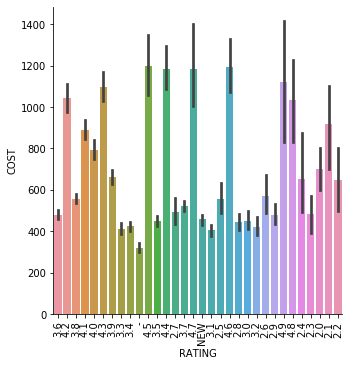

In [9]:
plt.figure(figsize=(30,30))
sns.catplot(x='RATING',y='COST',data=df_train,kind='bar')
plt.xticks(rotation=90)

In [10]:
df_train['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

In [11]:
#Replacing and filling the null values and 'NEW' to 0
df_train['RATING']=df_train['RATING'].replace('NEW','0')
df_test['RATING']=df_test['RATING'].replace('NEW','0')

In [12]:
df_train['RATING']=df_train['RATING'].fillna(0)
df_test['RATING']=df_test['RATING'].fillna(0)

In [13]:
df_train['RATING']=df_train['RATING'].replace('-','0')
df_test['RATING']=df_test['RATING'].replace('-','0')

In [14]:
df_train['RATING']=df_train['RATING'].astype(float)
df_test['RATING']=df_test['RATING'].astype(float)

In [15]:
df_train['RATING'].mean()

3.4262962962963

In [16]:
df_test['RATING'].mean()

3.4222406050579

In [17]:
#Replacing all the zero values with mean value of the Rating
df_train['RATING']=df_train['RATING'].replace(0,df_train['RATING'].mean())
df_test['RATING']=df_test['RATING'].replace(0,df_test['RATING'].mean())

In [18]:
#Checking where both location as well as city is null
df_train[df_train['LOCALITY'].isnull() & df_train['CITY'].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,VOTE
129,None,9101,"North Indian, South Indian, Chinese, Continental","12noon – 3pm, 7pm – 2am (Mon-Sun)",NaN,NaN,3.600000,728 votes,500,728
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.000000,29 votes,600,29
466,None,1133,North Indian,4pm – 9pm (Mon-Sun),NaN,NaN,4.200000,55 votes,200,55
481,None,4788,Street Food,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",NaN,NaN,3.700000,616 votes,250,616
534,None,3233,"Healthy Food, Salad, Juices",11am – 10pm (Mon-Sun),NaN,NaN,3.600000,30 votes,600,30
...,...,...,...,...,...,...,...,...,...,...
12076,None,8687,"North Indian, Continental","12noon – 3:30pm, 6pm – 10:30pm (Mon-Sun)",NaN,NaN,4.100000,105 votes,500,105
12268,None,2177,Desserts,10am – 10pm (Mon-Sun),NaN,NaN,3.426296,NaN,200,0
12280,None,3446,"North Indian, Chinese",5pm – 5am (Mon-Sun),NaN,NaN,3.700000,281 votes,500,281
12567,None,15532,"Biryani, Chinese, Fast Food, North Indian","11am – 1am (Mon, Sun), 11am – 12:15AM (Tue-Sat)",NaN,NaN,3.700000,656 votes,300,656


In [19]:
#Checking where both location and city is same and found 33 rows
df_train[df_train['LOCALITY']==df_train['CITY']].shape

(33, 10)

In [20]:
df_train['LOCALITY']=df_train['LOCALITY'].fillna('None')
df_test['LOCALITY']=df_test['LOCALITY'].fillna('None')

In [21]:
df_train['CITY']=df_train['CITY'].fillna('None')
df_test['CITY']=df_test['CITY'].fillna('None')

In [22]:
#Extracting the Cuisine column
cuisines = list(df_test['CUISINES'])
maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))

all_cuisines1=[]

for i in cuisines :
    if len(i.split(',')) == 1:
         all_cuisines1.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_cuisines1.append(i.split(',')[it].strip().upper())

In [23]:
cuisines = list(df_train['CUISINES'])
maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))

all_cuisines=[]

for i in cuisines :
    if len(i.split(',')) == 1:
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_cuisines.append(i.split(',')[it].strip().upper())

In [24]:
#Extracting the Title column
titles = list(df_test['TITLE'])

maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
            
all_titles1=[]

for i in titles :
    if len(i.split(',')) == 1:
         all_titles1.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles1.append(i.split(',')[it].strip().upper())

In [25]:
titles = list(df_train['TITLE'])

maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
            
all_titles=[]

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

In [26]:
pd.Series(all_cuisines).unique()

array(['MALWANI', 'GOAN', 'NORTH INDIAN', 'ASIAN', 'MODERN INDIAN',
       'JAPANESE', 'CHINESE', 'BIRYANI', 'HYDERABADI', 'TIBETAN',
       'DESSERTS', 'SEAFOOD', 'CAFE', 'PIZZA', 'BURGER', 'BAR FOOD',
       'SOUTH INDIAN', 'FAST FOOD', 'BEVERAGES', 'ARABIAN', 'MUGHLAI',
       'MAHARASHTRIAN', 'PARSI', 'THAI', 'BAKERY', 'MOMOS', 'CONTINENTAL',
       'EUROPEAN', 'ROLLS', 'ANDHRA', 'ITALIAN', 'BBQ', 'FINGER FOOD',
       'TEA', 'AMERICAN', 'HEALTHY FOOD', 'COFFEE', 'INDONESIAN',
       'KOREAN', 'NEPALESE', 'ICE CREAM', 'MEXICAN', 'KERALA', 'INDIAN',
       'MITHAI', 'STREET FOOD', 'MALAYSIAN', 'VIETNAMESE', 'IRANIAN',
       'KEBAB', 'JUICES', 'SANDWICH', 'MEDITERRANEAN', 'SALAD',
       'GUJARATI', 'RAJASTHANI', 'TEX-MEX', 'ROAST CHICKEN', 'BURMESE',
       'CHETTINAD', 'NORTH EASTERN', 'LEBANESE', 'COFFEE AND TEA',
       'GRILL', '', 'BIHARI', 'BENGALI', 'LUCKNOWI', 'AWADHI', 'STEAK',
       'FRENCH', 'PORTUGUESE', 'WRAPS', 'SRI LANKAN', 'ORIYA',
       'ETHIOPIAN', 'KONKAN', 'SU

In [27]:
pd.Series(all_titles).unique()

array(['CASUAL DINING', 'BAR', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ',
       'MICROBREWERY', 'BEVERAGE SHOP', 'IRANI CAFE', 'BAKERY', 'NONE',
       'PUB', 'FINE DINING', 'SWEET SHOP', 'LOUNGE', 'FOOD COURT',
       'FOOD TRUCK', 'MESS', 'KIOSK', 'CLUB', 'CONFECTIONERY', 'DHABA',
       'MEAT SHOP', 'COCKTAIL BAR', 'PAAN SHOP'], dtype=object)

In [28]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,VOTE
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,221
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,165


In [29]:
titles = list(df_train['TITLE'])
T1=[]
T2=[]
for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')


In [30]:
all_titles.append('NONE')

In [31]:
cuisines = list(df_train['CUISINES'])
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []

for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

all_cuisines.append('NONE')


In [32]:
df_train.shape

(12690, 10)

In [33]:
new_data_train = {}

new_data_train['TITLE1'] = T1
new_data_train['TITLE2'] = T2
new_data_train['RESTAURANT_ID'] = df_train["RESTAURANT_ID"]
new_data_train['CUISINE1'] = C1
new_data_train['CUISINE2'] = C2
new_data_train['CUISINE3'] = C3
new_data_train['CUISINE4'] = C4
new_data_train['CUISINE5'] = C5
new_data_train['CUISINE6'] = C6
new_data_train['CUISINE7'] = C7
new_data_train['CUISINE8'] = C8
new_data_train['CITY'] = df_train['CITY']
new_data_train['LOCALITY'] = df_train['LOCALITY']
new_data_train['RATING'] = df_train['RATING']
new_data_train['VOTES'] = df_train['VOTE']
new_data_train['COST'] = df_train['COST']

In [34]:
new_data_train = pd.DataFrame(new_data_train)

In [35]:
titles = list(df_test['TITLE'])
T1=[]
T2=[]
for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

In [36]:
all_titles1.append('NONE')

In [37]:
cuisines = list(df_test['CUISINES'])
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []

for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

all_cuisines1.append('NONE')


In [38]:
new_data_test = {}

new_data_test['TITLE1'] = T1
new_data_test['TITLE2'] = T2
new_data_test['RESTAURANT_ID'] = df_test["RESTAURANT_ID"]
new_data_test['CUISINE1'] = C1
new_data_test['CUISINE2'] = C2
new_data_test['CUISINE3'] = C3
new_data_test['CUISINE4'] = C4
new_data_test['CUISINE5'] = C5
new_data_test['CUISINE6'] = C6
new_data_test['CUISINE7'] = C7
new_data_test['CUISINE8'] = C8
new_data_test['CITY'] = df_test['CITY']
new_data_test['LOCALITY'] = df_test['LOCALITY']
new_data_test['RATING'] = df_test['RATING']
new_data_test['VOTES'] = df_test['VOTE']


In [39]:
new_data_test = pd.DataFrame(new_data_test)

In [40]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,Thane,Dombivali East,3.6,49,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,Chennai,Saligramam,3.8,221,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Mumbai,Lower Parel,3.8,165,300


In [41]:
new_data_test.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,NONE,4085,NORTH INDIAN,CHINESE,MUGHLAI,KEBAB,NONE,NONE,NONE,NONE,Noida,Sector 18,4.3,564
1,QUICK BITES,NONE,12680,SOUTH INDIAN,FAST FOOD,PIZZA,NORTH INDIAN,NONE,NONE,NONE,NONE,Mumbai,Grant Road,4.2,61
2,CASUAL DINING,NONE,1411,NORTH INDIAN,SEAFOOD,BIRYANI,CHINESE,NONE,NONE,NONE,NONE,Mumbai,Marine Lines,3.8,350
3,NONE,NONE,204,BIRYANI,NONE,NONE,NONE,NONE,NONE,NONE,NONE,Faridabad,NIT,3.8,1445
4,QUICK BITES,NONE,13453,SOUTH INDIAN,KERALA,NONE,NONE,NONE,NONE,NONE,NONE,Kochi,Kaloor,3.6,23


In [42]:
new_data_train.dtypes

TITLE1            object
TITLE2            object
RESTAURANT_ID      int64
CUISINE1          object
CUISINE2          object
CUISINE3          object
CUISINE4          object
CUISINE5          object
CUISINE6          object
CUISINE7          object
CUISINE8          object
CITY              object
LOCALITY          object
RATING           float64
VOTES             object
COST               int64
dtype: object

In [43]:
#Encoding all the categorical values  using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data_train['CITY']=le.fit_transform(new_data_train['CITY'])
new_data_train['LOCALITY']=le.fit_transform(new_data_train['LOCALITY'])
new_data_train['TITLE1']=le.fit_transform(new_data_train['TITLE1'])
new_data_train['TITLE2']=le.fit_transform(new_data_train['TITLE2'])
new_data_train['CUISINE1']=le.fit_transform(new_data_train['CUISINE1'])
new_data_train['CUISINE2']=le.fit_transform(new_data_train['CUISINE2'])
new_data_train['CUISINE3']=le.fit_transform(new_data_train['CUISINE3'])
new_data_train['CUISINE4']=le.fit_transform(new_data_train['CUISINE4'])
new_data_train['CUISINE5']=le.fit_transform(new_data_train['CUISINE5'])
new_data_train['CUISINE6']=le.fit_transform(new_data_train['CUISINE6'])
new_data_train['CUISINE7']=le.fit_transform(new_data_train['CUISINE7'])
new_data_train['CUISINE8']=le.fit_transform(new_data_train['CUISINE8'])


In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data_test['CITY']=le.fit_transform(new_data_test['CITY'])
new_data_test['LOCALITY']=le.fit_transform(new_data_test['LOCALITY'])
new_data_test['TITLE1']=le.fit_transform(new_data_test['TITLE1'])
new_data_test['TITLE2']=le.fit_transform(new_data_test['TITLE2'])
new_data_test['CUISINE1']=le.fit_transform(new_data_test['CUISINE1'])
new_data_test['CUISINE2']=le.fit_transform(new_data_test['CUISINE2'])
new_data_test['CUISINE3']=le.fit_transform(new_data_test['CUISINE3'])
new_data_test['CUISINE4']=le.fit_transform(new_data_test['CUISINE4'])
new_data_test['CUISINE5']=le.fit_transform(new_data_test['CUISINE5'])
new_data_test['CUISINE6']=le.fit_transform(new_data_test['CUISINE6'])
new_data_test['CUISINE7']=le.fit_transform(new_data_test['CUISINE7'])
new_data_test['CUISINE8']=le.fit_transform(new_data_test['CUISINE8'])

In [45]:
new_data_train.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,4,15,9438,59,32,67,61,58,47,32,15,321,285,3.6,49,1200
1,4,1,13198,6,60,41,61,58,47,32,15,67,1047,4.2,30,1500
2,4,15,10915,72,23,12,32,58,47,32,15,67,1102,3.8,221,800
3,21,15,6346,100,23,65,61,58,47,32,15,222,136,4.1,24,800
4,8,15,15387,28,65,65,61,58,47,32,15,222,620,3.8,165,300


In [46]:
x_train=new_data_train.drop(['COST'],axis=1)

In [47]:
y_train=new_data_train['COST']
y_train.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

In [48]:
x_test=new_data_test.iloc[:,:]

In [49]:
new_data_test.head()

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,5,13,4085,60,19,56,33,42,30,25,6,110,663,4.3,564
1,22,13,12680,73,24,62,50,42,30,25,6,96,221,4.2,61
2,5,13,1411,60,70,13,15,42,30,25,6,96,411,3.8,350
3,19,13,204,12,59,58,49,42,30,25,6,41,456,3.8,1445
4,22,13,13453,73,42,58,49,42,30,25,6,78,300,3.6,23


In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
score=lr.score(x_train,y_train)
print('Predictions:',pred)
print(score)



Predictions: [1063.17752571  716.47092717  966.6379937  ...  504.22163746  408.3492832
  507.93403389]
0.2238850272817109


In [51]:
#Applying Random Forest Regressor algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfc=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 20],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(rfc, params, cv = 3)

In [58]:
#after finding the best parameter through grid search cv
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)
    rmsle=(np.sqrt(mean_squared_log_error(y,pred)))
    print("The score is:",score)
    print("The root mean squared error is:",rmsle)
        
evaluate(x_train, y_train, 'training')



The score is: 0.8272157153549976
The root mean squared error is: 0.3075160841787483


In [59]:
y_pred=model.predict(x_test)

In [60]:
#Predicted Cost the test Dataset
y_pred_rfc = pd.DataFrame(y_pred, columns = ['COST'])
print(y_pred_rfc)

             COST
0     1829.649174
1      363.746096
2     2089.833696
3     1007.068443
4      354.168379
...           ...
4226  2113.904155
4227  1020.235371
4228   318.092714
4229   328.420539
4230   334.549252

[4231 rows x 1 columns]


In [61]:
from sklearn.externals import joblib
joblib.dump(model,'restaurant_food-cost_regression.pkl')

['restaurant_food-cost_regression.pkl']